Zadanie 2 (15 pkt) 
W zadaniu wykorzystaj zbiór danych zawierajacy cechy samochodów, gdzie zmienna objasniajaca znajduje sie w pierwszej kolumnie
 (mpg- miles per gallon, czyli spalanie). Braki danych w zbiorze oznaczone sa znakiem „?”. 
Kolejne zmienne oddzielone sa spacja. Zbiór danych znajduje sie pod adresem:

https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data

Kolejne kolumny w zbiorze danych to:
1. mpg: continuous  2. cylinders: multi-valued discrete 3. displacement: 
continuous 4. horsepower: continuous 5. weight: continuous 6. acceleration: continuous 7. model_year: multi-valued discrete  
 8. origin: multi-valued discrete 9. car_name: string (unique for each instance)

Wykonaj nastepujace polecenia:

	1.Wgraj dane bezposrednio z internetu. (2 pkt). 
	2.Nazwij kolumny jak w liscie powyzej (mozna skrócic nazwy). (2 pkt)
	3.Usun ostatnia kolumne danych. Usun braki danych. (2 pkt)
	4.Jakie jest srednie spalanie samochodów o liczbie cylindrów równej 8 i mocy (horsepower) wiekszej niz mediana mocy? (3pkt) 
	5.Wyswietl na wykresie slupkowym srednie spalanie dla kolejnych dwuletnich grup roku produkcji samochodu. (3 pkt)
	6.Na jednym rysunku narysuj 4 wykresy rozrzutu zmiennej objasnianej i zmiennych displacement, horsepower, weight, acceleration. Dla kazdego wykresu nanies linie regresji. (3 pkt)


# Pudpunkt 1, 2

In [2]:
import numpy as np
import pandas as pd
import statistics #do mediany

In [3]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', 
                    sep='\s+', 
                    header = None,
                    names=["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin", "car_name"])


In [4]:
data.head(100)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
95,12.0,8,455.0,225.0,4951.0,11.0,73,1,buick electra 225 custom
96,13.0,8,360.0,175.0,3821.0,11.0,73,1,amc ambassador brougham
97,18.0,6,225.0,105.0,3121.0,16.5,73,1,plymouth valiant
98,16.0,6,250.0,100.0,3278.0,18.0,73,1,chevrolet nova custom


# Podpunkt 3

In [5]:
data.tail(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger
397,31.0,4,119.0,82.00,2720.0,19.4,82,1,chevy s-10


In [6]:
data.drop(data.tail(1).index,inplace=True)

In [7]:
data.tail(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


# Podpunkt 4

In [8]:
#kolumna horsepower do lsity
horsepower_median = data['horsepower'].tolist()
#pominiecie ?
horsepower_median = [elem for elem in horsepower_median if elem != '?']
#zamiana do numeric
horsepower_median = pd.to_numeric(horsepower_median)
#wykorzystanie median
horsepower_median = statistics.median(horsepower_median)
#print(horsepower_median)

cons =  [] #tablica ze spalaniami kazdego z aut
for index, row in data.iterrows(): 
    if row['horsepower'] != '?': #pominiecie '?'
        if (float(row['horsepower']) > horsepower_median) and (int(row['cylinders']) == 8): #wytyczne do podpunktu
            cons.append(float(row['mpg'])) #dodanie do listy

#print(cons) 
#uzycie numpy do znalezienia sredniej wartosci spalania samochodow
avg = np.mean(cons)

#odpowiedz
print(avg)

14.875490196078431


# Podpunkt 5

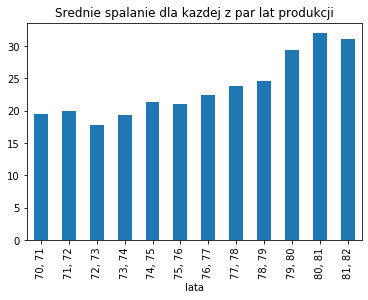

In [9]:
years = [] #wszystkie lata produkcji
years_pair = [] #kazda z par dwuletnich grup produkcji
x_val = [] #tablica do danych w wykressie (poziom)
y_val = []

for index, row in data.iterrows():  #dodawanie do listy kazdey rok
    years.append(row['model_year'])
    

years = list(set(years))
#print(years) #lsita wszystkich rocznikow

for i in range(0, len(years)-1): #wypisujemy pary kolejnych rocznikow
    x_val.append(f"{years[i]}, {years[i+1]}")
    temp = []
    temp.append(years[i])
    temp.append(years[i+1])
    years_pair.append(temp)
    
#print(years_pair)

y_val = []
            
for years in years_pair:
    temp = data[(data['model_year'] == years[0]) | (data['model_year'] == years[1])] #robimy nowe dataframe tylko z rocznikami sasiadujacymi po kolei
    y_val.append(round(temp['mpg'].mean(),2)) #dodajemy srednia wartosc z kolumny mpg (spalanie) z zaokrągleniem do dwóch
        

#print(y_val) #srednie spalanie z kazdej pary lat
#print(x_val)

    
#wynik
wynik = pd.DataFrame({'lata':x_val, 'średnie spalanie':y_val})
ax = wynik.plot.bar(x='lata', y='średnie spalanie', legend=False, title='Srednie spalanie dla kazdej z par lat produkcji')

# Podpunkt 6

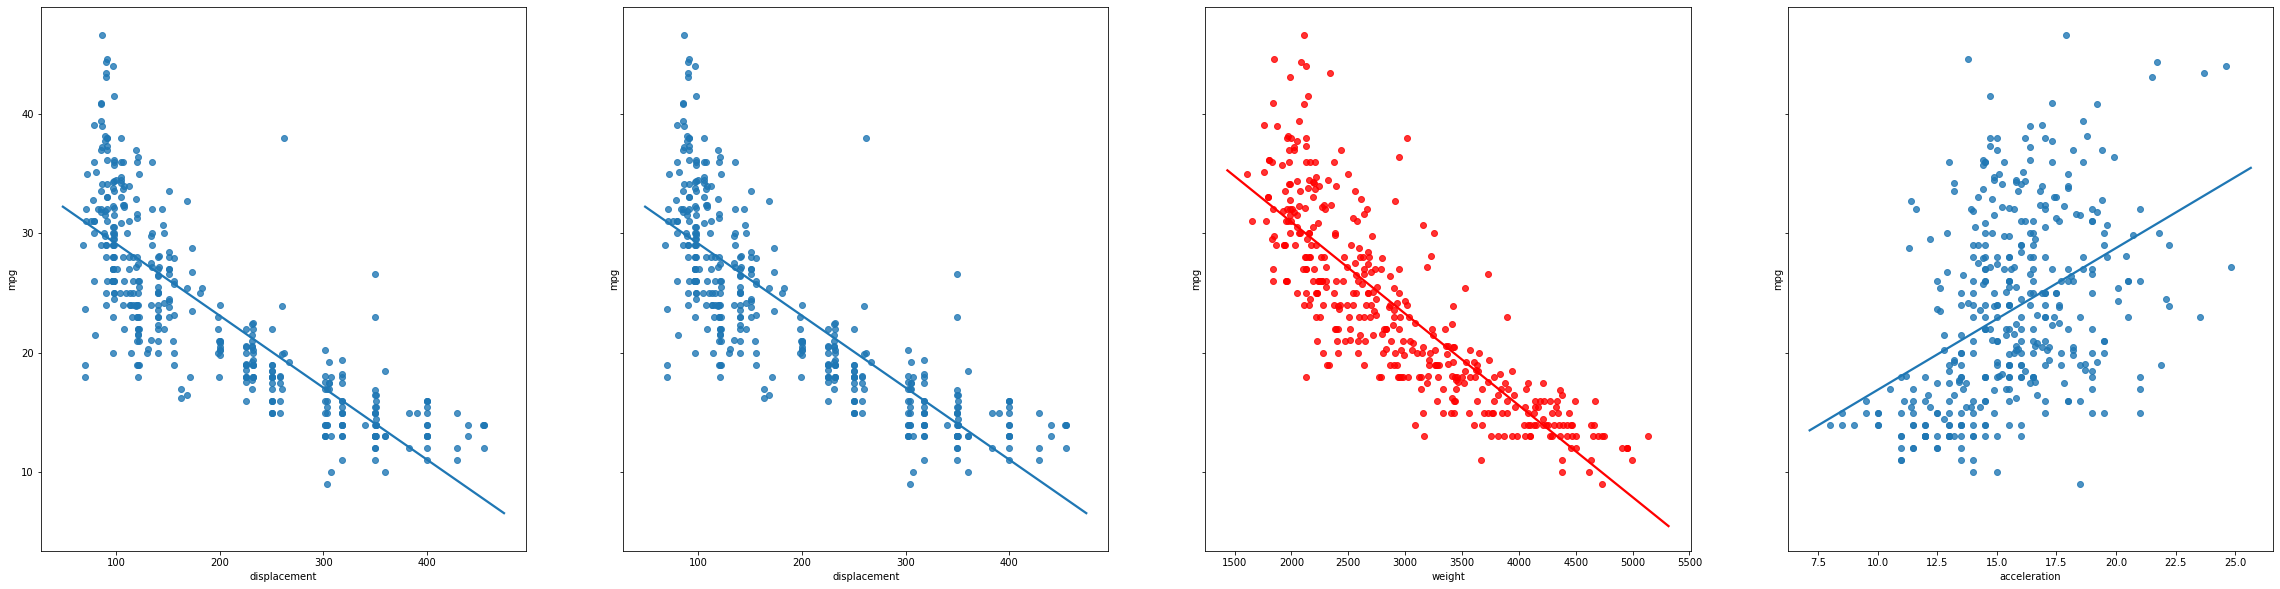

In [10]:
import seaborn
import matplotlib.pyplot as plt

data1 = data.replace({'?': '10.0'})


fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, sharey=True, figsize=(40,10))



seaborn.regplot(x ='displacement', y='mpg', data=data1, truncate=False, ax=ax1, ci = None)

seaborn.regplot(x ='displacement', y='mpg', data=data1, truncate=False, ax=ax2, ci = None)

seaborn.regplot(x ='weight',   y='mpg', data=data, truncate=False, color='red', ax=ax3, ci = None)

seaborn.regplot(x ='acceleration', y='mpg', data=data, truncate=False, ax=ax4, ci = None)